**Name:** Muluwork Geremew 

**Course:** Advanced Big Data and Data Mining  
**Lab Assignment:** Classification Using KNN and RNN Algorithms Lab 2

In [34]:
%pip install matplotlib numpy scipy scikit-learn scikit-image pandas torch torchvision

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 57.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 60.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 24.8 MB/s eta 0:00:00
Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl (12 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [torchvision] [torchvision]]
Note: you may need to restart the kernel to use updated packages.


In [ ]:

from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

Note: you may need to restart the kernel to use updated packages.


### Step 1: Load and Prepare the Dataset

In [ ]:
# %pip install pandas
import pandas as pd


# 1. Create a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [16]:

# 2. Peek at the first few rows
print(df.head())

# 3. Check data types & non-null counts
print(df.info())

# 4. Get summary statistics for each feature
print(df.describe())

# 5. Look at class distribution
print(df['target'].value_counts())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
from sklearn.model_selection import train_test_split
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20,    # 20% test set
    random_state=42,   # for reproducibility, random_state ensures we get the same split every run.
    stratify=y         # preserves class proportions, keeps the three wine-class proportions consistent between train and test.
)
# Quick check of shapes:
print("Training features shape:", X_train.shape)
print("Test features shape:    ", X_test.shape)
print("Training labels shape:  ", y_train.shape)
print("Test labels shape:      ", y_test.shape)

Training features shape: (142, 13)
Test features shape:     (36, 13)
Training labels shape:   (142,)
Test labels shape:       (36,)


### Step 2: Implement K-Nearest Neighbors (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# 1. Create a KNN classifier
k_values = [1, 5, 11, 15, 21]
knn_accuracies = {}

# 2. Fit the model and evaluate accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) # Create a KNN classifier with k neighbors
    knn.fit(X_train, y_train) # Fit the model on the training data
    score = knn.score(X_test, y_test) # Evaluate the model on the test data
    knn_accuracies[k] = score   
    print(f"k = {k:2d} → test accuracy = {score:.4f}")



k =  1 → test accuracy = 0.7778
k =  5 → test accuracy = 0.8056
k = 11 → test accuracy = 0.8056
k = 15 → test accuracy = 0.8056
k = 21 → test accuracy = 0.8056


### Step 3: Implement Radius Neighbors (RNN) 

In [50]:
#Implement the RNN Classifier using radius values such as 350, 400, 450, 500, 550, and 600
from sklearn.neighbors import RadiusNeighborsClassifier
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = {}

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r)
    rnn.fit(X_train, y_train)
    score = rnn.score(X_test, y_test)
    rnn_accuracies[r] = score
    print(f"radius = {r:3d} → test accuracy = {score:.3f}")

radius = 350 → test accuracy = 0.722
radius = 400 → test accuracy = 0.694
radius = 450 → test accuracy = 0.694
radius = 500 → test accuracy = 0.694
radius = 550 → test accuracy = 0.667
radius = 600 → test accuracy = 0.667


### Step 4: Visualize and Compare Results

knn_accuracies: ['0.778', '0.806', '0.806', '0.806', '0.806']


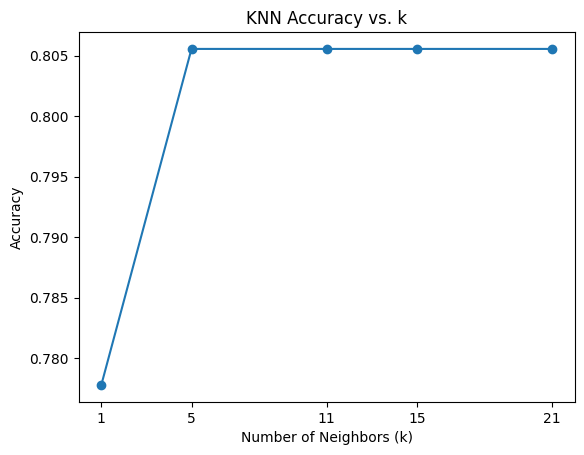

In [36]:

import matplotlib.pyplot as plt

print(f"knn_accuracies: {[f'{k:.3f}' for k in knn_accuracies]}")

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

rnn_accuracies: ['0.7222', '0.6944', '0.6944', '0.6944', '0.6667', '0.6667']


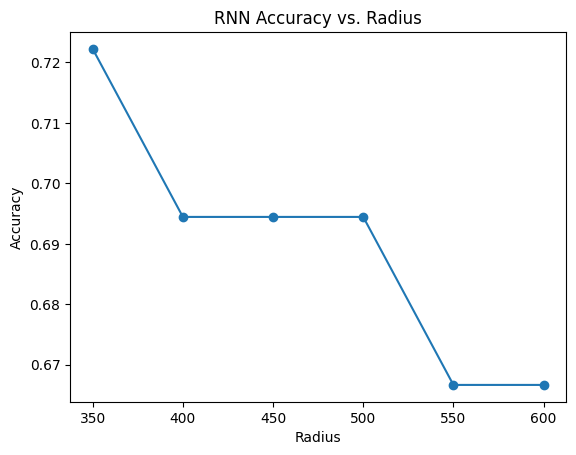

In [54]:
print(f"rnn_accuracies: {[f'{rnn_accuracies[r]:.4f}' for r in radius_values]}")
plt.figure()
plt.plot(radius_values, [rnn_accuracies[r] for r in radius_values], marker='o')
plt.title('RNN Accuracy vs. Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.xticks(radius_values)
plt.show()


## Key Observations

### 1. KNN Steadily Outperforms RNN
- Across all chosen radii, the Radius Neighbors classifier never reaches the accuracy achieved by even the simplest KNN setting (k=1).
- **KNN** peaks at about **0.806** for k ≥ 5, whereas **RNN** tops out at **0.722** for radius = 350.

### 2. KNN Accuracy Plateaus After k ≈ 5
- Accuracy jumps from **0.778** at k=1 up to **0.806** at k=5, and remains stable through k=21.
- This suggests diminishing returns from larger neighborhoods; extra neighbors beyond k=5 mostly reinforce the same class vote.

### 3. RNN Accuracy Declines as Radius Grows
- With a small radius (350), RNN achieves its best performance (**0.722**).
- As the radius increases, more distant (and potentially different-class) points are included, reducing discriminative power.

### 4. Sensitivity to Scale and Density
- **KNN** always uses exactly k neighbors, making it robust to regions of varying density.
- **RNN** includes all neighbors within a fixed distance:
    - If the radius is too small, some points may have too few (or zero) neighbors.
    - If too large, decisions are diluted by points from other classes.

---

## When to Prefer KNN vs. RNN

### Choose **KNN** When:
- Consistent decision-making is needed, regardless of data density.
- You prefer to specify "look at exactly k neighbors" rather than an absolute distance.
- Features are not on a uniform scale (or not normalized); KNN is more forgiving since it cares about relative ordering of distances.

### Choose **RNN** When:
- Natural clusters of roughly uniform radius are expected, and denser clusters should vote more strongly.
- All features are carefully normalized or standardized, so a radius truly represents "similarity."
- A variable neighbor count is desired (many votes in dense regions, fewer in sparse), because density itself is informative.
